# Kaggle Competition

# Property Price Prediction - Advanced Regression Techniques

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing data set:
df=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Property_Price_Train.csv",index_col=0,header=0)
print(df.shape)
df.head(10)

(1459, 80)


,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RLD,85.0,14115,Paved,NaN,IR1,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,W,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,TF,0,NaN,Attchd,1993.0,Unf,2,703.481359,TA,TA,Y,0.621402,36.740335,70.350362,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RLD,75.0,10084,Paved,NaN,Reg,Lvl,AllPub,I,GS,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,SS,VinylSd,VinylSd,Stone,186.0,Gd,TA,PC,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,TF,1,Gd,Attchd,2004.0,RFn,2,555.415694,TA,TA,Y,39.047177,118.613457,-7.064622,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RLD,NaN,10382,Paved,NaN,IR1,Lvl,AllPub,C,GS,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,SS,HdBoard,HdBoard,Stone,240.0,TA,TA,CB,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,TF,2,TA,Attchd,1973.0,RFn,2,737.632993,TA,TA,Y,201.101046,150.621507,76.9

In [3]:
df.tail(10)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1450,180,RMD,21.0,1533,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,TF,0,NaN,NaN,NaN,NaN,0,349.820761,NaN,NaN,Y,168.315750,-13.551088,4.360198,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1451,90,RLD,60.0,9000,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,TF,0,NaN,NaN,NaN,NaN,0,334.367666,NaN,NaN,Y,23.163353,-35.044491,-49.357801,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1452,20,RLD,78.0,9262,Paved,NaN,Reg,Lvl,AllPub,I,GS,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,SS,CemntBd,CmentBd,Stone,194.0,Gd,TA,PC,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,TF,1,Gd,Attchd,2008.0,Fin,3,763.660221,TA,TA,Y,20.020463,-25.811734,-20.252731,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1453,180,RMD,35.0,3675,Paved,NaN,Reg,Lvl,AllPub,I,GS,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,SS,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PC,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,TF,0,NaN,Basment,2005.0,Fin,2,514.423635,TA,TA,Y,152.513499,6.812704,-4.014572,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1454,20,RLD,90.0,17217,Paved,NaN,Reg,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,TF,0,NaN,NaN,NaN,NaN,0,538.606473,NaN,NaN,Y,53.845287,-5.819864,99.422640,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,I,GS,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,SS,VinylSd,VinylSd,None,0.0,Gd,TA,PC,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,TF,0,NaN,Attchd,2004.0,RFn,2,689.060909,TA,TA,Y,-9.973961,-9.267967,126.676547,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,TF,1,TA,Attchd,1999.0,RFn,2,644.100240,TA,TA,Y,-80.348891,113.043436,125.521880,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,I,GS,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,SS,Plywood,Plywood,Stone,119.0,TA,TA,CB,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,MD1,2,TA,Attchd,1978.0,Unf,2,180.864203,TA,TA,Y,36.180338,221.514480,148.266666,0,0,0,Na

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1200 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Lane_Type                  91 non-null     object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1459 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Neighborhood               1459 non-null   object 
 12  Condition1                 1459 non-null   object 
 13  Condition2                 1459 non-null   objec

In [5]:
df.describe(include="all")

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
count,1459.000000,1459,1200.000000,1459.000000,1459,91,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1459,1459,1451,1451.00000,1459,1459,1459,1422,1422,1421,1422,1459.000000,1421,1459.000000,1459.000000,1459.000000,1459,1459,1459,1458,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459.000000,1459,1459.000000,770,1378,1378.000000,1378,1459.000000,1459.000000,1378,1378,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,7,281,54,1459.000000,1459.000000,1459.000000,1459,1459,1459.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,7,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RLD,NaN,NaN,Paved,Grvl,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,SS,VinylSd,VinylSd,None,NaN,TA,TA,PC,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,TF,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1150,NaN,NaN,1453,50,924,1310,1458,1051,1381,225,1259,1444,1219,725,NaN,NaN,NaN,NaN,1140,1433,515,504,863,NaN,906,1281,647,648,1310,952,430,NaN,1256,NaN,NaN,NaN,1427,741,1364,1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,NaN,1359,NaN,380,869,NaN,605,NaN,NaN,1310,1325,1339,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1266,1197,NaN
mean,56.922550,NaN,70.045833,10517.225497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100069,5.575051,1971.272104,1984.879369,NaN,NaN,NaN,NaN,NaN,103.75672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.374914,NaN,46.382454,567.535984,1057.293352,NaN,NaN,NaN,NaN,1162.562714,347.230295,5.848526,1515.641535,0.424949,0.057574,1.565456,0.382454,2.866347,1.046607,NaN,6.518163,NaN,0.613434,NaN,NaN,1978.515965,NaN,1.767649,470.934787,NaN,NaN,NaN,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,NaN,NaN,NaN,43.518849,6.322138,2007.815627,NaN,NaN,180944.102810
std,42.304033,NaN,24.294456,9984.675721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383171,1.113125,30.212814,20.645927,NaN,NaN,NaN,NaN,NaN,181.10815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.142186,NaN,161.248500,441.874057,438.824912,NaN,NaN,NaN,NaN,386.712553,436.583480,48.639512,525.616607,0.518870,0.238830,0.550906,0.502798,0.816050,0.220410,NaN,1.625894,NaN,0.644687,NaN,NaN,24.696004,NaN,0.747301,210.668787,NaN,NaN,NaN,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,NaN,NaN,NaN,496.291826,2.704540,1.328542,NaN,NaN,79464.918335
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

<AxesSubplot:ylabel='Id'>

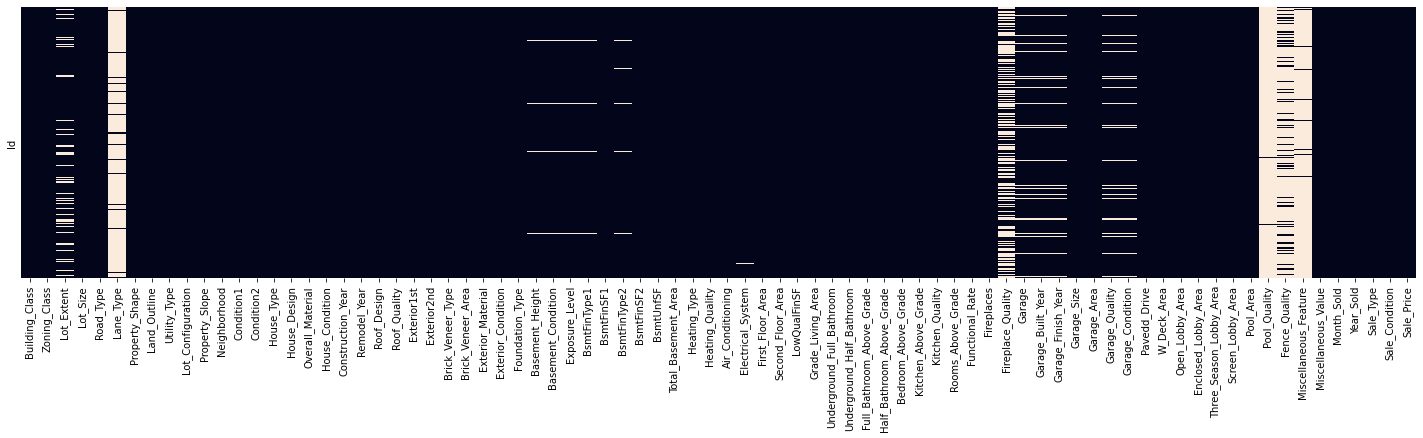

In [6]:
plt.figure(figsize=(25,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.isnull().sum()

Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Type                 0
Basement_Heigh

In [8]:
df.drop(["Lane_Type","Pool_Quality","Fence_Quality","Miscellaneous_Feature"],axis=1,inplace=True)

In [9]:
df["Lot_Extent"].fillna(df["Lot_Extent"].mean(),inplace=True)
df["Brick_Veneer_Type"].fillna(df["Brick_Veneer_Type"].mode()[0],inplace=True)
df["Brick_Veneer_Area"].fillna(df["Brick_Veneer_Area"].mean(),inplace=True)

In [10]:
df["Basement_Height"].fillna(df["Basement_Height"].mode()[0],inplace=True)
df["Basement_Condition"].fillna(df["Basement_Condition"].mode()[0],inplace=True)
df["Exposure_Level"].fillna(df["Exposure_Level"].mode()[0],inplace=True)

In [11]:
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0],inplace=True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0],inplace=True)
df["Electrical_System"].fillna(df["Electrical_System"].mode()[0],inplace=True)

In [12]:
df["Fireplace_Quality"].fillna(df["Fireplace_Quality"].mode()[0],inplace=True)
df["Garage"].fillna(df["Garage"].mode()[0],inplace=True)
df["Garage_Quality"].fillna(df["Garage_Quality"].mode()[0],inplace=True)
df["Garage_Built_Year"].fillna(df["Garage_Built_Year"].mean(),inplace=True)

In [13]:
df["Garage_Finish_Year"].fillna(df["Garage_Finish_Year"].mode()[0],inplace=True)
df["Garage_Quality"].fillna(df["Garage_Quality"].mode()[0],inplace=True)
df["Garage_Condition"].fillna(df["Garage_Condition"].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [15]:
df1=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Exported_data\Clean_Test_Data.csv",index_col=0,header=0)
print(df1.shape)
df1.head()

(1116, 75)


,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RHD,80.0,16104.819760,Paved,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RLD,81.0,15639.150810,Paved,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RLD,74.0,3849.428920,Paved,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RLD,78.0,4955.447942,Paved,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RLD,43.0,3046.604942,Paved,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [16]:
df1.tail()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2572,120,RMD,35.000000,14061.642540,Paved,IR1,Bnk,AllPub,I,MS,Blueste,NoRMD,NoRMD,TwnhsE,1Story,8,5,1988,1988,Gable,SS,HdBoard,HdBoard,None,0.0,TA,TA,CB,Gd,TA,Gd,GLQ,577.0,Unf,0.0,427.0,1004.0,GasA,Gd,Y,SBrkr,1020,0,0,1020,1.0,0.0,1,0,1,1,TA,4,TF,0,Gd,Attchd,1988.000000,Unf,2.0,509.0,TA,TA,Y,135,0,0,0,0,0,0,3,2007,WD,NoRMDal
2573,20,RLD,68.580357,11789.205330,Paved,IR1,Bnk,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,1Story,7,5,1971,1971,Gable,SS,Plywood,Plywood,BrkFace,652.0,TA,TA,CB,Gd,TA,No,Rec,434.0,Unf,0.0,1262.0,1696.0,GasA,Ex,Y,SBrkr,1696,0,0,1696,0.0,0.0,2,0,3,1,TA,7,TF,2,TA,Attchd,1971.000000,Fin,2.0,625.0,TA,TA,Y,0,146,0,0,0,0,0,2,2007,WD,Normal
2574,20,RLD,70.000000,9634.794594,Paved,IR1,HLS,AllPub,CulDSac,GS,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,SS,WdShing,Plywood,None,0.0,Gd,TA,CB,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,TF,1,Gd,Attchd,1986.000000,Fin,2.0,691.0,Gd,Gd,Y,216,64,169,0,0,228,0,8,2007,WD,Normal
2575,50,RMD,50.000000,9748.360555,Paved,Reg,Lvl,AllPub,C,GS,IDOTRR,NoRMD,NoRMD,1Fam,1.5Fin,6,7,1940,1950,Gable,SS,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BT,TA,TA,No,ALQ,375.0,Unf,0.0,345.0,720.0,GasA,Gd,Y,FuseA,720,495,0,1215,0.0,0.0,1,0,3,1,Gd,6,TF,0,Gd,Detchd,1965.000000,Fin,2.0,720.0,TA,TA,Y,0,0,30,0,0,0,0,5,2007,WD,NoRMDal
2576,50,RMD,50.000000,6937.262823,Paved,Reg,Lvl,AllPub,I,GS,IDOTRR,Artery,NoRMD,1Fam,1.5Fin,5,7,1925,2003,Gable,SS,VinylSd,VinylSd,None,0.0,Gd,Gd,BT,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,TF,0,Gd,Attchd,1977.721217,Unf,0.0,0.0,TA,TA,N,0,0,0,176,0,0,0,9,2007,WD,NoRMDal


In [17]:
final_df=pd.concat([df,df1],axis=0)

In [18]:
print(final_df.shape)
final_df.head()

(2575, 76)


,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RLD,65.0,8450.0,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,Gd,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RLD,80.0,9600.0,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RLD,68.0,11250.0,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RLD,60.0,9550.0,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RLD,84.0,14260.0,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal,250000.0


In [19]:
final_df.tail()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2572,120,RMD,35.000000,14061.642540,Paved,IR1,Bnk,AllPub,I,MS,Blueste,NoRMD,NoRMD,TwnhsE,1Story,8,5,1988,1988,Gable,SS,HdBoard,HdBoard,None,0.0,TA,TA,CB,Gd,TA,Gd,GLQ,577.0,Unf,0.0,427.0,1004.0,GasA,Gd,Y,SBrkr,1020,0,0,1020,1.0,0.0,1,0,1,1,TA,4,TF,0,Gd,Attchd,1988.000000,Unf,2.0,509.0,TA,TA,Y,135.0,0.0,0.0,0,0,0,0,3,2007,WD,NoRMDal,NaN
2573,20,RLD,68.580357,11789.205330,Paved,IR1,Bnk,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,1Story,7,5,1971,1971,Gable,SS,Plywood,Plywood,BrkFace,652.0,TA,TA,CB,Gd,TA,No,Rec,434.0,Unf,0.0,1262.0,1696.0,GasA,Ex,Y,SBrkr,1696,0,0,1696,0.0,0.0,2,0,3,1,TA,7,TF,2,TA,Attchd,1971.000000,Fin,2.0,625.0,TA,TA,Y,0.0,146.0,0.0,0,0,0,0,2,2007,WD,Normal,NaN
2574,20,RLD,70.000000,9634.794594,Paved,IR1,HLS,AllPub,CulDSac,GS,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,SS,WdShing,Plywood,None,0.0,Gd,TA,CB,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,TF,1,Gd,Attchd,1986.000000,Fin,2.0,691.0,Gd,Gd,Y,216.0,64.0,169.0,0,0,228,0,8,2007,WD,Normal,NaN
2575,50,RMD,50.000000,9748.360555,Paved,Reg,Lvl,AllPub,C,GS,IDOTRR,NoRMD,NoRMD,1Fam,1.5Fin,6,7,1940,1950,Gable,SS,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BT,TA,TA,No,ALQ,375.0,Unf,0.0,345.0,720.0,GasA,Gd,Y,FuseA,720,495,0,1215,0.0,0.0,1,0,3,1,Gd,6,TF,0,Gd,Detchd,1965.000000,Fin,2.0,720.0,TA,TA,Y,0.0,0.0,30.0,0,0,0,0,5,2007,WD,NoRMDal,NaN
2576,50,RMD,50.000000,6937.262823,Paved,Reg,Lvl,AllPub,I,GS,IDOTRR,Artery,NoRMD,1Fam,1.5Fin,5,7,1925,2003,Gable,SS,VinylSd,VinylSd,None,0.0,Gd,Gd,BT,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,TF,0,Gd,Attchd,1977.721217,Unf,0.0,0.0,TA,TA,N,0.0,0.0,0.0,176,0,0,0,9,2007,WD,NoRMDal,NaN


<AxesSubplot:ylabel='Id'>

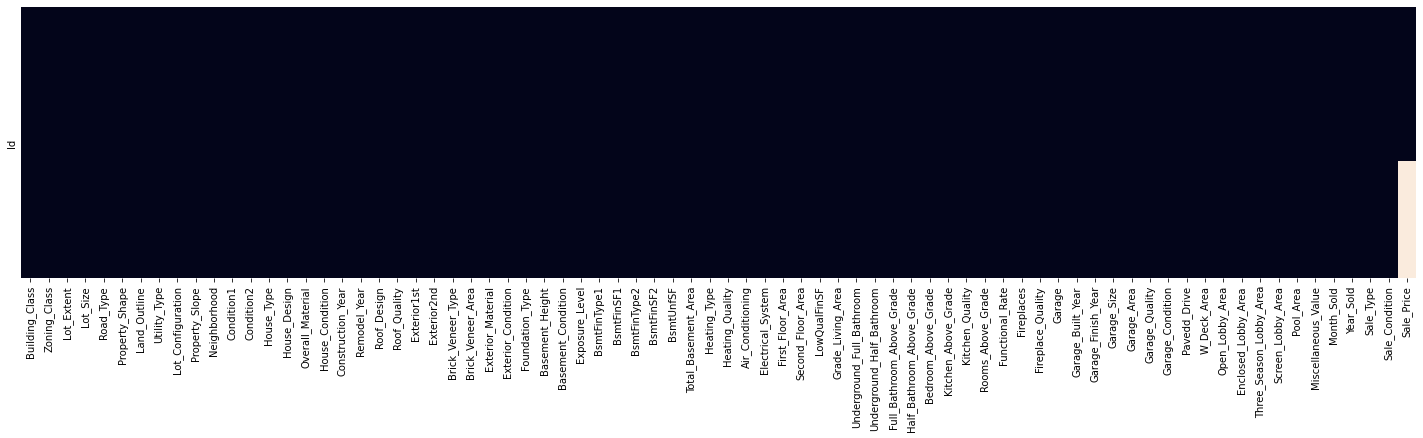

In [20]:
plt.figure(figsize=(25,5))
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False)

In [21]:
final_df.isnull().sum()

Building_Class                  0
Zoning_Class                    0
Lot_Extent                      0
Lot_Size                        0
Road_Type                       0
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               0
Brick_Veneer_Area               0
Exterior_Material               0
Exterior_Condition              0
Foundation_Type                 0
Basement_Height                 0
Basement_Condi

In [22]:
cat=[]
for i in final_df.columns:
    if final_df[i].dtypes==object:
        cat.append(i)

In [23]:
for i in cat:
    print(i,":")
    print(final_df[i].unique())
    print()

Zoning_Class :
['RLD' 'RMD' 'Commer' 'FVR' 'RHD']

Road_Type :
['Paved' 'Gravel']

Property_Shape :
['Reg' 'IR1' 'IR2' 'IR3']

Land_Outline :
['Lvl' 'Bnk' 'Low' 'HLS']

Utility_Type :
['AllPub' 'NoSeWa']

Lot_Configuration :
['I' 'FR2P' 'C' 'CulDSac' 'FR3P']

Property_Slope :
['GS' 'MS' 'SS']

Neighborhood :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe' 'NoRMD']

Condition2 :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe' 'NoRMD']

House_Type :
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

House_Design :
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Roof_Design :
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

Roof_Quality :
['SS' 'WSh' 'ME' 'WS' 'M' 'TG' 'R' 'CT']

Ex

In [24]:
final_df["Exterior2nd"]=final_df["Exterior2nd"].replace("Wd Shng","WdShing")
final_df["Exterior2nd"]=final_df["Exterior2nd"].replace("Brk Cmn","BrkComm")

In [25]:
for i in cat:
    print(i,":")
    print(final_df[i].unique())
    print()

Zoning_Class :
['RLD' 'RMD' 'Commer' 'FVR' 'RHD']

Road_Type :
['Paved' 'Gravel']

Property_Shape :
['Reg' 'IR1' 'IR2' 'IR3']

Land_Outline :
['Lvl' 'Bnk' 'Low' 'HLS']

Utility_Type :
['AllPub' 'NoSeWa']

Lot_Configuration :
['I' 'FR2P' 'C' 'CulDSac' 'FR3P']

Property_Slope :
['GS' 'MS' 'SS']

Neighborhood :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe' 'NoRMD']

Condition2 :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe' 'NoRMD']

House_Type :
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

House_Design :
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Roof_Design :
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

Roof_Quality :
['SS' 'WSh' 'ME' 'WS' 'M' 'TG' 'R' 'CT']

Ex

# Treating Outliers

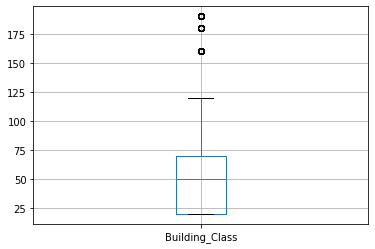

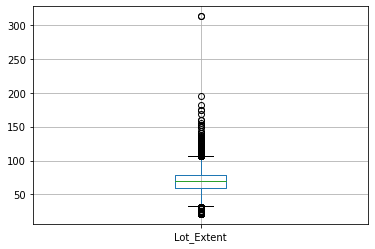

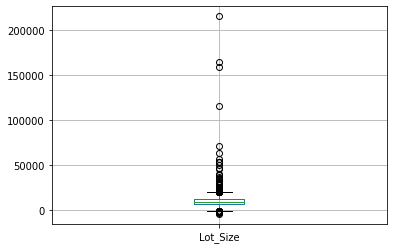

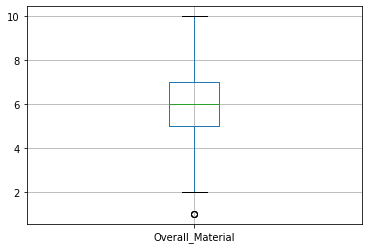

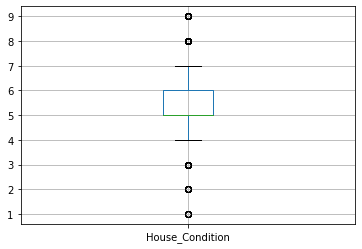

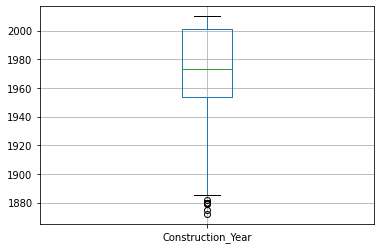

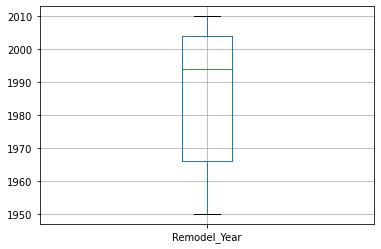

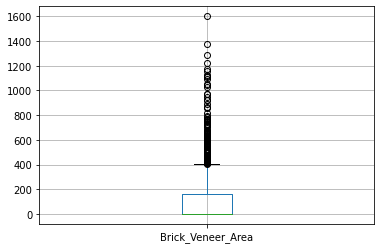

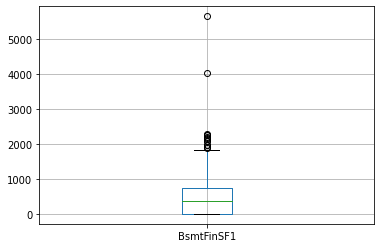

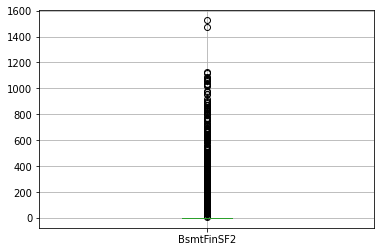

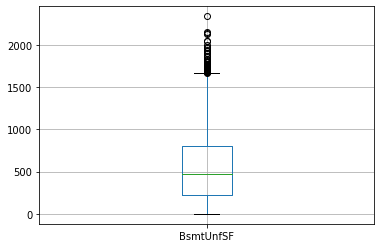

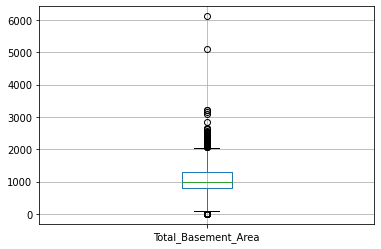

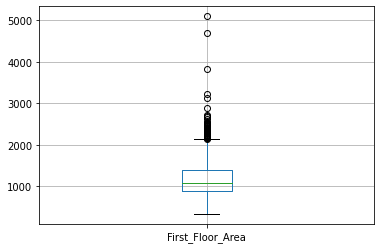

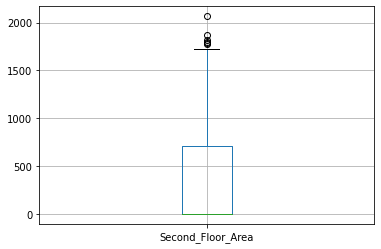

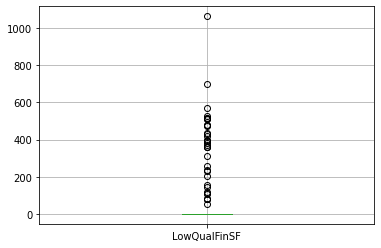

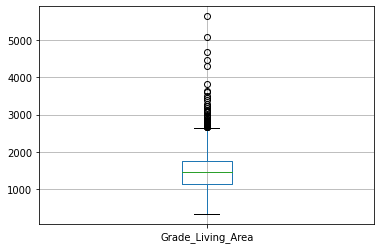

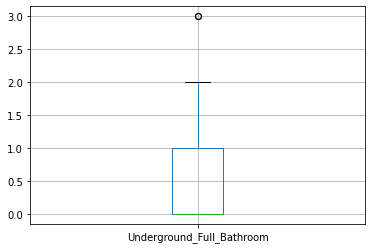

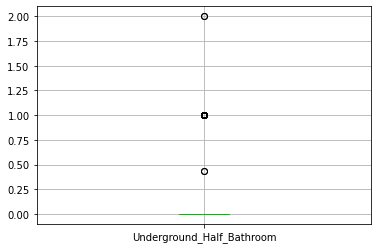

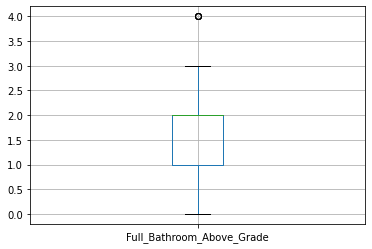

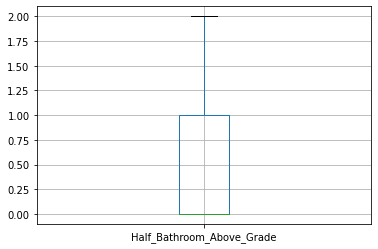

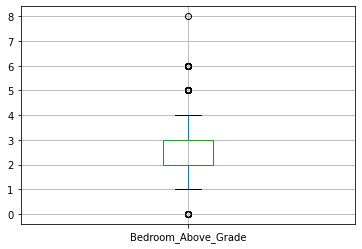

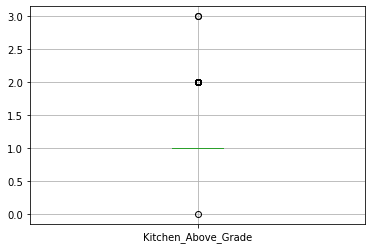

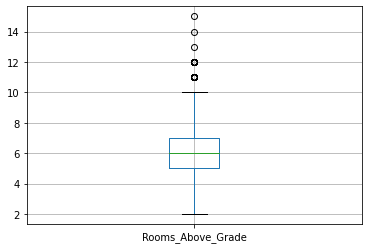

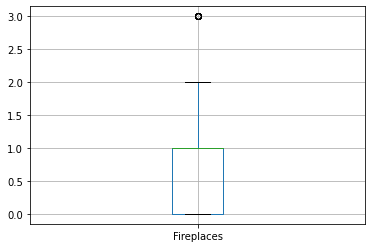

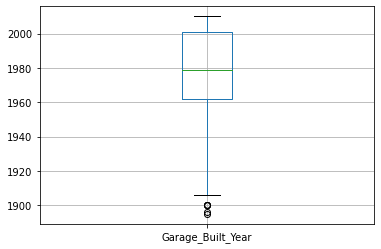

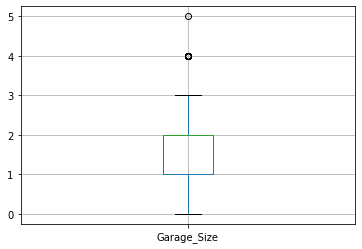

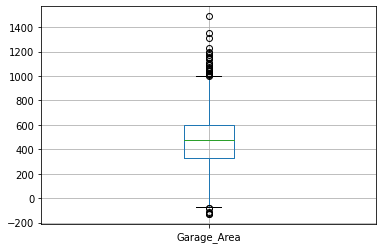

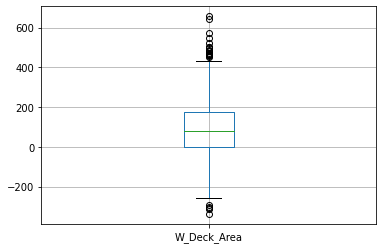

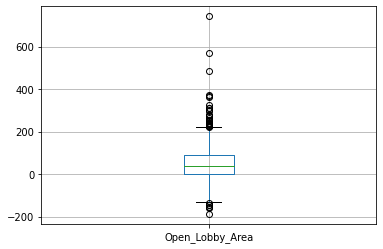

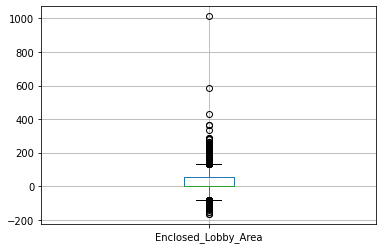

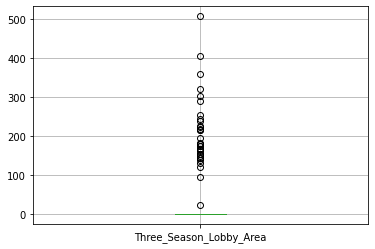

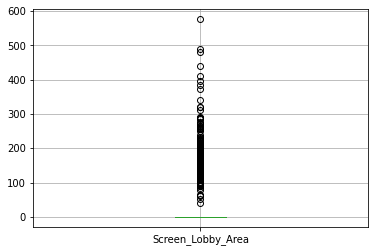

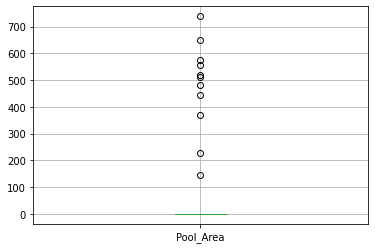

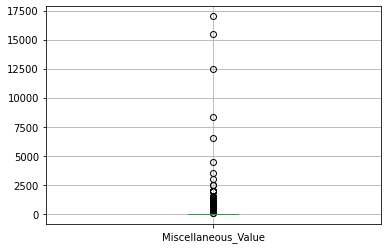

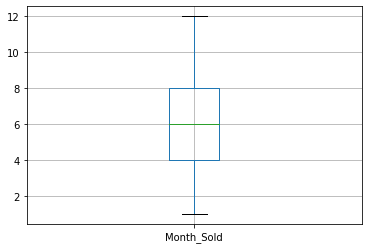

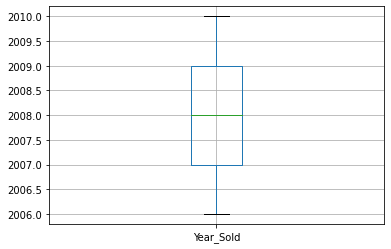

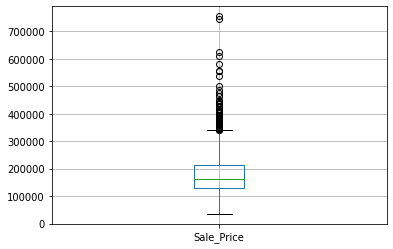

In [26]:
col=[]
for i in final_df.columns:
    if final_df[i].dtypes!=object:
        final_df.boxplot(column=i)
        plt.show()

(2401, 76)
(174, 76)
-55.0
48
(2575, 76)


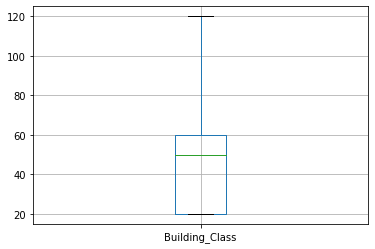

In [27]:
#for value in colname:
q1 = final_df['Building_Class'].quantile(0.25) #first quartile value
q3 = final_df['Building_Class'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

final_df_include = final_df.loc[(final_df['Building_Class'] >= low) & \
                                (final_df['Building_Class'] <= high)] # meeting the acceptable range
final_df_exclude = final_df.loc[(final_df['Building_Class'] < low) | (final_df['Building_Class'] > high)] #not meeting the acceptable range

print(final_df_include.shape)
print(final_df_exclude.shape)

print(low)

Building_Class_mean=int(final_df_include.Building_Class.mean()) #finding the mean of the acceptable range
print(Building_Class_mean)

#imputing outlier values with mean value
final_df_exclude.Building_Class=Building_Class_mean

#getting back the original shape of df
train_rev1=pd.concat([final_df_include,final_df_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev1.shape)

train_rev1.boxplot(column="Building_Class")
plt.show()

(2359, 76)
(216, 76)
32.25
68
(2575, 76)


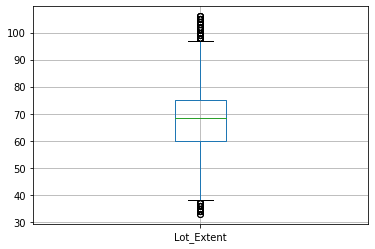

In [28]:
#for value in colname:
q1 = train_rev1['Lot_Extent'].quantile(0.25) #first quartile value
q3 = train_rev1['Lot_Extent'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev1_include = train_rev1.loc[(train_rev1['Lot_Extent'] >= low) & \
                                (train_rev1['Lot_Extent'] <= high)] # meeting the acceptable range
train_rev1_exclude = train_rev1.loc[(train_rev1['Lot_Extent'] < low) | (train_rev1['Lot_Extent'] > high)] #not meeting the acceptable range

print(train_rev1_include.shape)
print(train_rev1_exclude.shape)

print(low)

Lot_Extent_mean=int(train_rev1_include.Lot_Extent.mean()) #finding the mean of the acceptable range
print(Lot_Extent_mean)

#imputing outlier values with mean value
train_rev1_exclude.Lot_Extent=Lot_Extent_mean

#getting back the original shape of df
train_rev2=pd.concat([train_rev1_include,train_rev1_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev2.shape)

train_rev2.boxplot(column=["Lot_Extent"])
plt.show()

(2475, 76)
(100, 76)
-418.2966537500015
9504
(2575, 76)


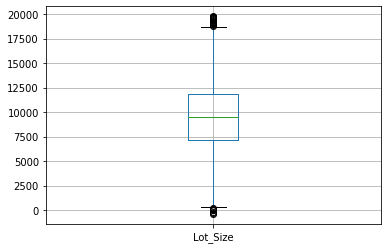

In [29]:
#for value in colname:
q1 = train_rev2['Lot_Size'].quantile(0.25) #first quartile value
q3 = train_rev2['Lot_Size'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev2_include = train_rev2.loc[(train_rev2['Lot_Size'] >= low) & \
                                (train_rev2['Lot_Size'] <= high)] # meeting the acceptable range
train_rev2_exclude = train_rev2.loc[(train_rev2['Lot_Size'] < low) | (train_rev2['Lot_Size'] > high)] #not meeting the acceptable range

print(train_rev2_include.shape)
print(train_rev2_exclude.shape)

print(low)

Lot_Size_mean=int(train_rev2_include.Lot_Size.mean()) #finding the mean of the acceptable range
print(Lot_Size_mean)

#imputing outlier values with mean value
train_rev2_exclude.Lot_Size=Lot_Size_mean

#getting back the original shape of df
train_rev3=pd.concat([train_rev2_include,train_rev2_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev3.shape)

train_rev3.boxplot(column=["Lot_Size"])
plt.show()

(2350, 76)
(225, 76)
3.5
5
(2575, 76)


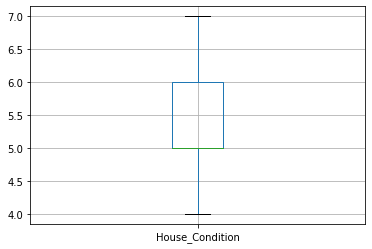

In [30]:
#for value in colname:
q1 = train_rev3['House_Condition'].quantile(0.25) #first quartile value
q3 = train_rev3['House_Condition'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev3_include = train_rev3.loc[(train_rev3['House_Condition'] >= low) & \
                                (train_rev3['House_Condition'] <= high)] # meeting the acceptable range
train_rev3_exclude = train_rev3.loc[(train_rev3['House_Condition'] < low) | (train_rev3['House_Condition'] > high)] #not meeting the acceptable range

print(train_rev3_include.shape)
print(train_rev3_exclude.shape)

print(low)

House_Condition_mean=int(train_rev3_include.House_Condition.mean()) #finding the mean of the acceptable range
print(House_Condition_mean)

#imputing outlier values with mean value
train_rev3_exclude.House_Condition=House_Condition_mean

#getting back the original shape of df
train_rev4=pd.concat([train_rev3_include,train_rev3_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev4.shape)

train_rev4.boxplot(column=["House_Condition"])
plt.show()

(2566, 76)
(9, 76)
1883.5
1971
(2575, 76)


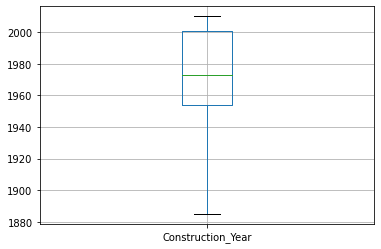

In [31]:
q1 = train_rev4['Construction_Year'].quantile(0.25) #first quartile value
q3 = train_rev4['Construction_Year'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev4_include = train_rev4.loc[(train_rev3['Construction_Year'] >= low) & \
                                (train_rev3['Construction_Year'] <= high)] # meeting the acceptable range
train_rev4_exclude = train_rev4.loc[(train_rev3['Construction_Year'] < low) | (train_rev3['Construction_Year'] > high)] #not meeting the acceptable range

print(train_rev4_include.shape)
print(train_rev4_exclude.shape)

print(low)

Construction_Year_mean=int(train_rev4_include.Construction_Year.mean()) #finding the mean of the acceptable range
print(Construction_Year_mean)

#imputing outlier values with mean value
train_rev4_exclude.Construction_Year=Construction_Year_mean

#getting back the original shape of df
train_rev5=pd.concat([train_rev4_include,train_rev4_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev5.shape)

train_rev5.boxplot(column=["Construction_Year"])
plt.show()

(2402, 76)
(225, 76)
-244.5
65
(2575, 76)


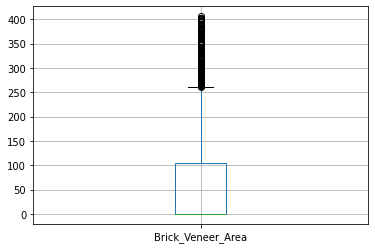

In [32]:
#for value in colname:
q1 = train_rev5['Brick_Veneer_Area'].quantile(0.25) #first quartile value
q3 = train_rev5['Brick_Veneer_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev5_include = train_rev5.loc[(train_rev5['Brick_Veneer_Area'] >= low) & \
                                (train_rev5['Brick_Veneer_Area'] <= high)] # meeting the acceptable range
train_rev5_exclude = train_rev5.loc[(train_rev5['Brick_Veneer_Area'] < low) | (train_rev5["Brick_Veneer_Area"] > high)] #not meeting the acceptable range

print(train_rev5_include.shape)
print(train_rev3_exclude.shape)

print(low)

Brick_Veneer_Area_mean=int(train_rev5_include.Brick_Veneer_Area.mean()) #finding the mean of the acceptable range
print(Brick_Veneer_Area_mean)

#imputing outlier values with mean value
train_rev5_exclude.Brick_Veneer_Area= Brick_Veneer_Area_mean

#getting back the original shape of df
train_rev6=pd.concat([train_rev5_include,train_rev5_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev6.shape)

train_rev6.boxplot(column = ["Brick_Veneer_Area"])
plt.show()

(2561, 76)
(14, 76)
-1093.5
416
(2575, 76)


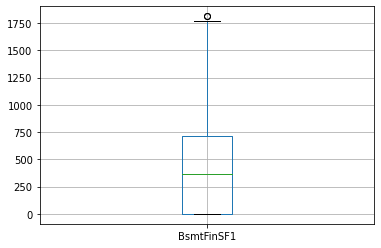

In [33]:
#for value in colname:
q1 = train_rev6['BsmtFinSF1'].quantile(0.25) #first quartile value
q3 = train_rev6['BsmtFinSF1'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev6_include = train_rev6.loc[(train_rev6['BsmtFinSF1'] >= low) & \
                                (train_rev6['BsmtFinSF1'] <= high)] # meeting the acceptable range
train_rev6_exclude = train_rev6.loc[(train_rev5['BsmtFinSF1'] < low) | (train_rev6['BsmtFinSF1'] > high)] #not meeting the acceptable range

print(train_rev6_include.shape)
print(train_rev6_exclude.shape)

print(low)

BsmtFinSF1_mean=int(train_rev5_include.BsmtFinSF1.mean()) #finding the mean of the acceptable range
print(BsmtFinSF1_mean)

#imputing outlier values with mean value
train_rev6_exclude.BsmtFinSF1= BsmtFinSF1_mean

#getting back the original shape of df
train_rev7=pd.concat([train_rev6_include,train_rev6_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev7.shape)

train_rev7.boxplot(column = ['BsmtFinSF1'])
plt.show()

(2261, 76)
(314, 76)
0.0
0
(2575, 76)


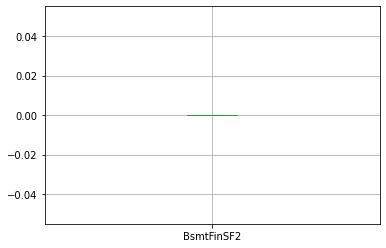

In [34]:
#for value in colname:
q1 = train_rev7[ 'BsmtFinSF2'].quantile(0.25) #first quartile value
q3 = train_rev7[ 'BsmtFinSF2'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

train_rev7_include = train_rev7.loc[(train_rev7[ 'BsmtFinSF2'] >= low) & \
                                    (train_rev7[ 'BsmtFinSF2'] <= high)] # meeting the acceptable range
train_rev7_exclude = train_rev7.loc[(train_rev7[ 'BsmtFinSF2'] < low) | (train_rev7[ 'BsmtFinSF2'] > high)] #not meeting the acceptable range

print(train_rev7_include.shape)
print(train_rev7_exclude.shape)

print(low)

BsmtFinSF2_mean=int(train_rev7_include.BsmtFinSF2.mean()) #finding the mean of the acceptable range
print(BsmtFinSF2_mean)

#imputing outlier values with mean value
train_rev7_exclude.BsmtFinSF2= BsmtFinSF2_mean

#getting back the original shape of df
train_rev8=pd.concat([train_rev7_include,train_rev7_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev8.shape)

train_rev8.boxplot(column = [ 'BsmtFinSF2'])
plt.show()

(2525, 76)
(50, 76)
-640.75
535
(2575, 76)


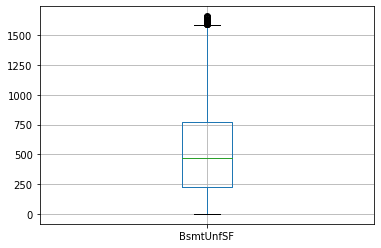

In [35]:
#for value in colname:
q1 = train_rev8['BsmtUnfSF'].quantile(0.25) #first quartile value
q3 = train_rev8['BsmtUnfSF'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev8_include = train_rev8.loc[(train_rev8['BsmtUnfSF'] >= low) & \
                                    (train_rev8['BsmtUnfSF'] <= high)] # meeting the acceptable range
train_rev8_exclude = train_rev8.loc[(train_rev8['BsmtUnfSF'] < low) | (train_rev8['BsmtUnfSF'] > high)] #not meeting the acceptable range

print(train_rev8_include.shape)
print(train_rev8_exclude.shape)

print(low)

BsmtUnfSF_mean=int(train_rev8_include.BsmtUnfSF.mean()) #finding the mean of the acceptable range
print(BsmtUnfSF_mean)

#imputing outlier values with mean value
train_rev8_exclude.BsmtUnfSF= BsmtUnfSF_mean

#getting back the original shape of df
train_rev9=pd.concat([train_rev8_include,train_rev8_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev9.shape)

train_rev9.boxplot(column = [ 'BsmtUnfSF'])
plt.show()

(2464, 76)
(111, 76)
27.0
1056
(2575, 76)


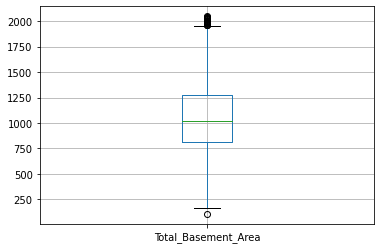

In [36]:
#for value in colname:
q1 = train_rev9['Total_Basement_Area'].quantile(0.25) #first quartile value
q3 = train_rev9['Total_Basement_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev9_include = train_rev9.loc[(train_rev9['Total_Basement_Area'] >= low) & \
                                    (train_rev9['Total_Basement_Area'] <= high)] # meeting the acceptable range
train_rev9_exclude = train_rev9.loc[(train_rev9['Total_Basement_Area'] < low) | (train_rev9['Total_Basement_Area'] > high)] #not meeting the acceptable range

print(train_rev9_include.shape)
print(train_rev9_exclude.shape)

print(low)

Total_Basement_Area_mean=int(train_rev9_include.Total_Basement_Area.mean()) #finding the mean of the acceptable range
print(Total_Basement_Area_mean)

#imputing outlier values with mean value
train_rev9_exclude.Total_Basement_Area= Total_Basement_Area_mean

#getting back the original shape of df
train_rev10=pd.concat([train_rev9_include,train_rev9_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev10.shape)

train_rev10.boxplot(column = [ 'Total_Basement_Area'])
plt.show()

(2533, 76)
(42, 76)
123.25
1137
(2575, 76)


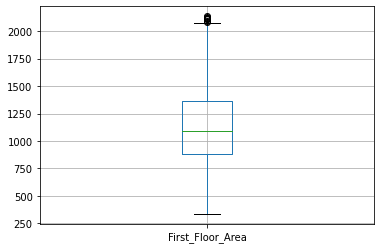

In [37]:
#for value in colname:
q1 = train_rev10['First_Floor_Area'].quantile(0.25) #first quartile value
q3 = train_rev10['First_Floor_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev10_include = train_rev10.loc[(train_rev10['First_Floor_Area'] >= low) & \
                                    (train_rev10['First_Floor_Area'] <= high)] # meeting the acceptable range
train_rev10_exclude = train_rev10.loc[(train_rev10['First_Floor_Area'] < low) | (train_rev10['First_Floor_Area'] > high)] #not meeting the acceptable range

print(train_rev10_include.shape)
print(train_rev10_exclude.shape)

print(low)

First_Floor_Area_mean=int(train_rev10_include.First_Floor_Area.mean()) #finding the mean of the acceptable range
print(First_Floor_Area_mean)

#imputing outlier values with mean value
train_rev10_exclude.First_Floor_Area= First_Floor_Area_mean

#getting back the original shape of df
train_rev11=pd.concat([train_rev10_include,train_rev10_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev11.shape)

train_rev11.boxplot(column = [ 'First_Floor_Area'])
plt.show()

(2569, 76)
(6, 76)
-1065.0
333
(2575, 76)


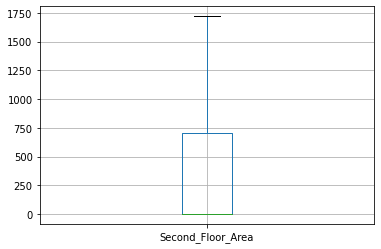

In [38]:
#for value in colname:
q1 = train_rev11['Second_Floor_Area'].quantile(0.25) #first quartile value
q3 = train_rev11['Second_Floor_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev11_include = train_rev11.loc[(train_rev11['Second_Floor_Area'] >= low) & \
                                    (train_rev11['Second_Floor_Area'] <= high)] # meeting the acceptable range
train_rev11_exclude = train_rev11.loc[(train_rev11['Second_Floor_Area'] < low) | (train_rev11['Second_Floor_Area'] > high)] #not meeting the acceptable range

print(train_rev11_include.shape)
print(train_rev11_exclude.shape)

print(low)

Second_Floor_Area_mean=int(train_rev11_include.Second_Floor_Area.mean()) #finding the mean of the acceptable range
print(Second_Floor_Area_mean)

#imputing outlier values with mean value
train_rev11_exclude.Second_Floor_Area= Second_Floor_Area_mean

#getting back the original shape of df
train_rev12=pd.concat([train_rev11_include,train_rev11_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev12.shape)

train_rev12.boxplot(column = [ 'Second_Floor_Area'])
plt.show()

(2539, 76)
(36, 76)
0.0
0
(2575, 76)


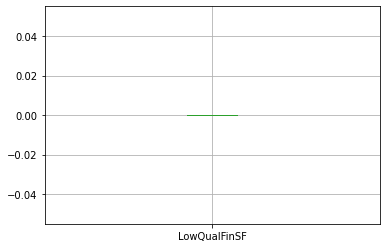

In [39]:
#for value in colname:
q1 = train_rev12['LowQualFinSF'].quantile(0.25) #first quartile value
q3 = train_rev12['LowQualFinSF'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev12_include = train_rev12.loc[(train_rev12['LowQualFinSF'] >= low) & \
                                    (train_rev12['LowQualFinSF'] <= high)] # meeting the acceptable range
train_rev12_exclude = train_rev12.loc[(train_rev12['LowQualFinSF'] < low) | (train_rev12['LowQualFinSF'] > high)] #not meeting the acceptable range

print(train_rev12_include.shape)
print(train_rev12_exclude.shape)

print(low)

LowQualFinSF_mean=int(train_rev12_include.LowQualFinSF.mean()) #finding the mean of the acceptable range
print(LowQualFinSF_mean)

#imputing outlier values with mean value
train_rev12_exclude.LowQualFinSF= LowQualFinSF_mean

#getting back the original shape of df
train_rev13=pd.concat([train_rev12_include,train_rev12_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev13.shape)

train_rev13.boxplot(column = [ 'LowQualFinSF'])
plt.show()

(2543, 76)
(32, 76)
-73.02377725000014
468
(2575, 76)


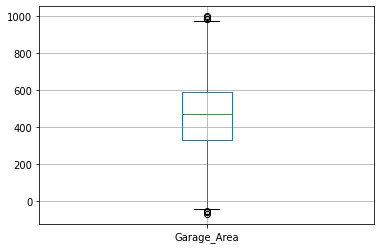

In [40]:
#for value in colname:
q1 = train_rev13['Garage_Area'].quantile(0.25) #first quartile value
q3 = train_rev13['Garage_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev13_include = train_rev13.loc[(train_rev12['Garage_Area'] >= low) & \
                                    (train_rev12['Garage_Area'] <= high)] # meeting the acceptable range
train_rev13_exclude = train_rev13.loc[(train_rev12['Garage_Area'] < low) | (train_rev12['Garage_Area'] > high)] #not meeting the acceptable range

print(train_rev13_include.shape)
print(train_rev13_exclude.shape)

print(low)

Garage_Area_mean=int(train_rev13_include.Garage_Area.mean()) #finding the mean of the acceptable range
print(Garage_Area_mean)

#imputing outlier values with mean value
train_rev13_exclude.Garage_Area= Garage_Area_mean

#getting back the original shape of df
train_rev14=pd.concat([train_rev13_include,train_rev13_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev14.shape)

train_rev14.boxplot(column = [ 'Garage_Area'])
plt.show()

(2551, 76)
(24, 76)
-260.435880825
89
(2575, 76)


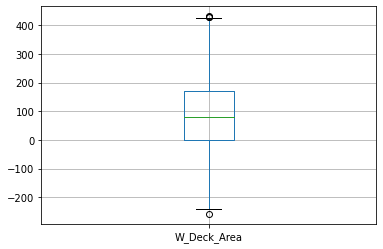

In [41]:
#for value in colname:
q1 = train_rev14['W_Deck_Area'].quantile(0.25) #first quartile value
q3 = train_rev14['W_Deck_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev14_include = train_rev14.loc[(train_rev14['W_Deck_Area'] >= low) & \
                                    (train_rev14['W_Deck_Area'] <= high)] # meeting the acceptable range
train_rev14_exclude = train_rev14.loc[(train_rev14['W_Deck_Area'] < low) | (train_rev14['W_Deck_Area'] > high)] #not meeting the acceptable range

print(train_rev14_include.shape)
print(train_rev14_exclude.shape)

print(low)

W_Deck_Area_mean=int(train_rev14_include.W_Deck_Area.mean()) #finding the mean of the acceptable range
print(W_Deck_Area_mean)

#imputing outlier values with mean value
train_rev14_exclude.W_Deck_Area= W_Deck_Area_mean

#getting back the original shape of df
train_rev15=pd.concat([train_rev14_include,train_rev14_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev15.shape)

train_rev15.boxplot(column = [ 'W_Deck_Area'])
plt.show()

(2533, 76)
(42, 76)
-133.3452458025
45
(2575, 76)


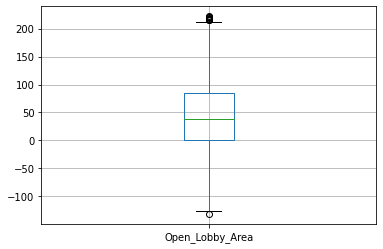

In [42]:
#for value in colname:
q1 = train_rev15['Open_Lobby_Area'].quantile(0.25) #first quartile value
q3 = train_rev15['Open_Lobby_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev15_include = train_rev15.loc[(train_rev15['Open_Lobby_Area'] >= low) & \
                                    (train_rev15['Open_Lobby_Area'] <= high)] # meeting the acceptable range
train_rev15_exclude = train_rev15.loc[(train_rev15['Open_Lobby_Area'] < low) | (train_rev15['Open_Lobby_Area'] > high)] #not meeting the acceptable range

print(train_rev15_include.shape)
print(train_rev15_exclude.shape)

print(low)

Open_Lobby_Area_mean=int(train_rev15_include.Open_Lobby_Area.mean()) #finding the mean of the acceptable range
print(Open_Lobby_Area_mean)

#imputing outlier values with mean value
train_rev15_exclude.Open_Lobby_Area= Open_Lobby_Area_mean

#getting back the original shape of df
train_rev16=pd.concat([train_rev15_include,train_rev15_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(train_rev16.shape)

train_rev16.boxplot(column = [ 'Open_Lobby_Area'])
plt.show()

(2365, 76)
(210, 76)
-80.16930619499999
17
(2575, 76)


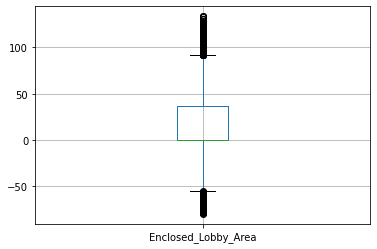

In [43]:
#for value in colname:
q1 = train_rev16['Enclosed_Lobby_Area'].quantile(0.25) #first quartile value
q3 = train_rev16['Enclosed_Lobby_Area'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
train_rev16_include = train_rev16.loc[(train_rev16['Enclosed_Lobby_Area'] >= low) & \
                                    (train_rev16['Enclosed_Lobby_Area'] <= high)] # meeting the acceptable range
train_rev16_exclude = train_rev16.loc[(train_rev16['Enclosed_Lobby_Area'] < low) | (train_rev16['Enclosed_Lobby_Area'] > high)] #not meeting the acceptable range

print(train_rev16_include.shape)
print(train_rev16_exclude.shape)

print(low)

Enclosed_Lobby_Area_mean=int(train_rev16_include.Enclosed_Lobby_Area.mean()) #finding the mean of the acceptable range
print(Enclosed_Lobby_Area_mean)

#imputing outlier values with mean value
train_rev16_exclude.Enclosed_Lobby_Area= Enclosed_Lobby_Area_mean

#getting back the original shape of df
final_df1=pd.concat([train_rev16_include,train_rev16_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(final_df1.shape)

final_df1.boxplot(column = [ 'Enclosed_Lobby_Area'])
plt.show()

In [44]:
# #for value in colname:
# q1 = train_rev17['Sale_Price'].quantile(0.25) #first quartile value
# q3 = train_rev17['Sale_Price'].quantile(0.75) # third quartile value
# iqr = q3-q1 #Interquartile range
# low  = q1-1.5*iqr #acceptable range
# high = q3+1.5*iqr #acceptable range
# train_rev17_include = train_rev17.loc[(train_rev17['Sale_Price'] >= low) & \
#                                     (train_rev17['Sale_Price'] <= high)] # meeting the acceptable range
# train_rev17_exclude = train_rev17.loc[(train_rev17['Sale_Price'] < low) | (train_rev17['Sale_Price'] > high)] #not meeting the acceptable range

# print(train_rev17_include.shape)
# print(train_rev17_exclude.shape)

# print(low)

# Sale_Price_mean=int(train_rev17_include.Sale_Price.mean()) #finding the mean of the acceptable range
# print(Sale_Price_mean)

# #imputing outlier values with mean value
# train_rev17_exclude.Sale_Price= Sale_Price_mean

# #getting back the original shape of df
# final_df1=pd.concat([train_rev17_include,train_rev17_exclude],axis=0) #concatenating both dfs to get 
# #the original shape
# print(final_df1.shape)

# final_df1.boxplot(column = [ 'Sale_Price'])
# plt.show()

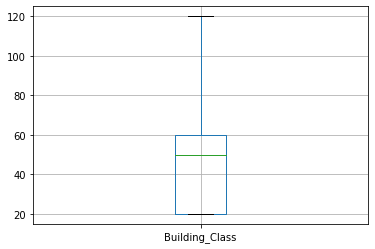

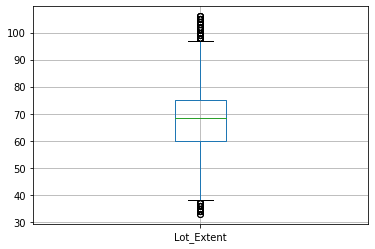

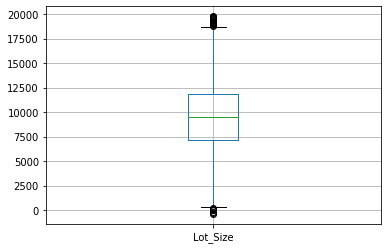

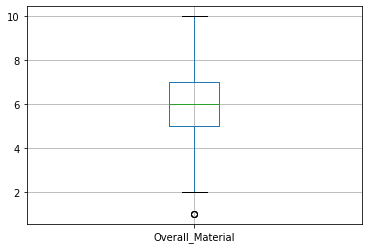

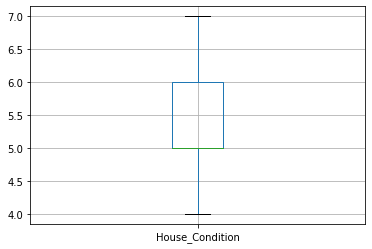

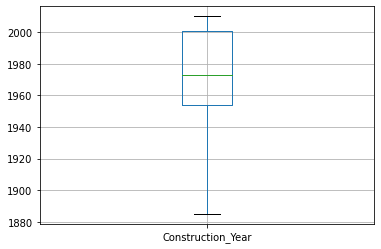

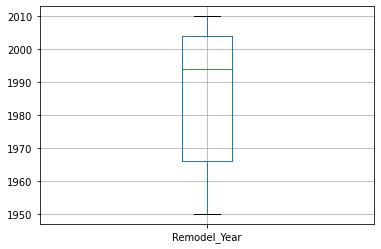

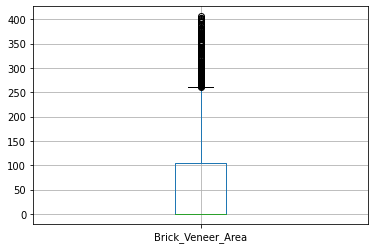

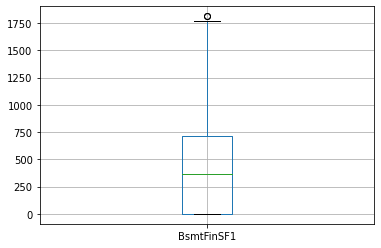

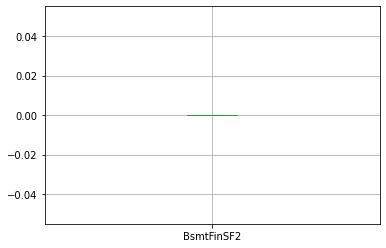

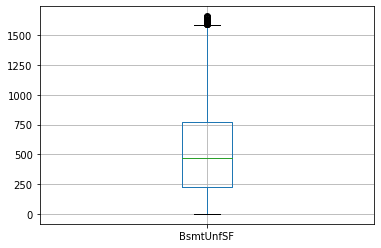

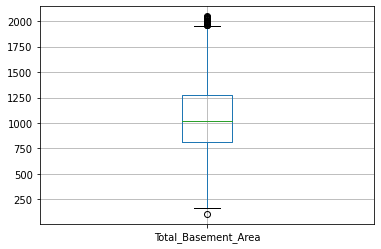

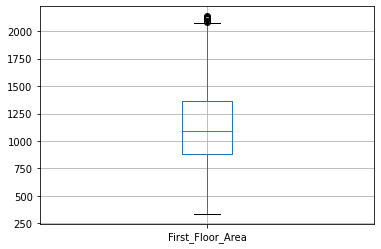

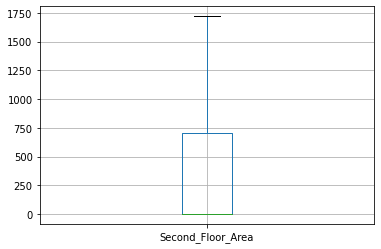

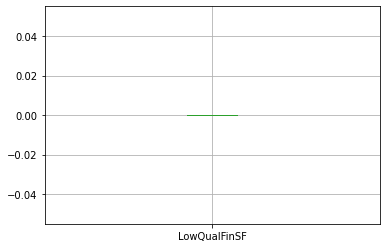

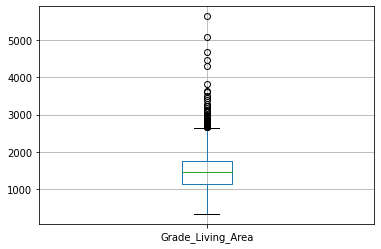

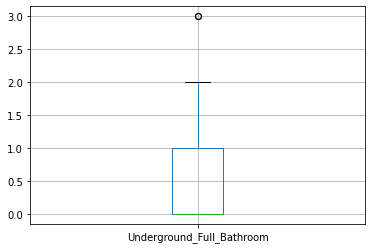

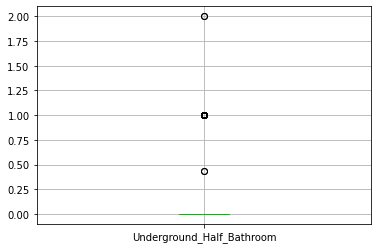

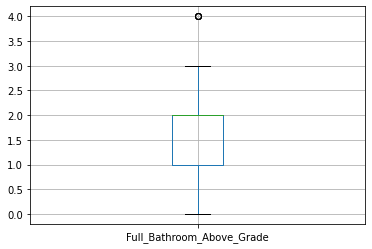

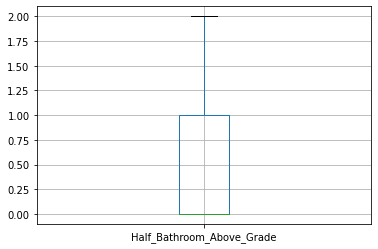

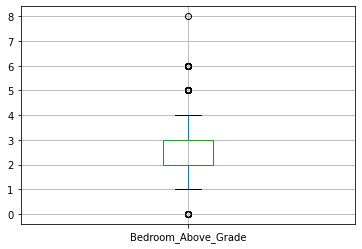

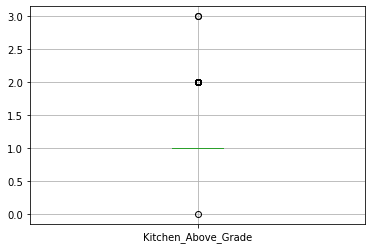

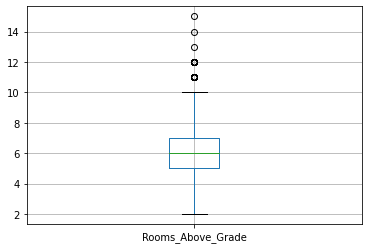

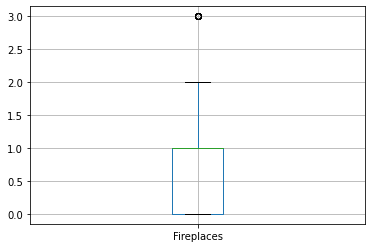

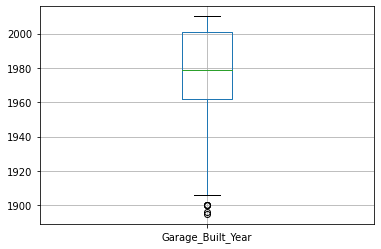

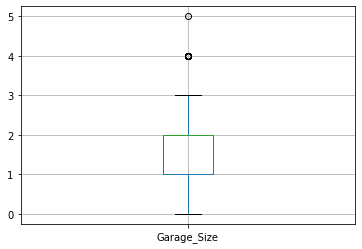

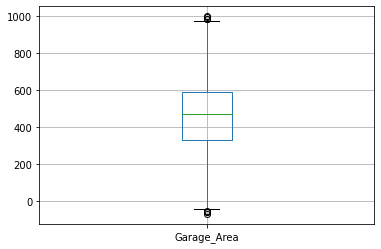

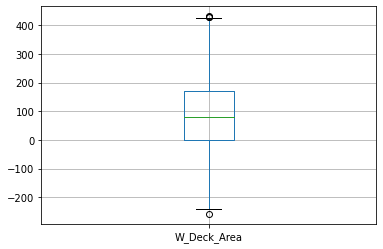

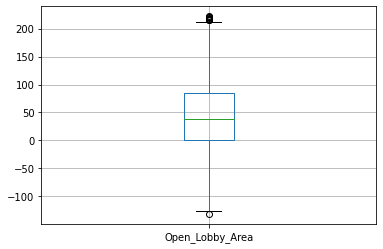

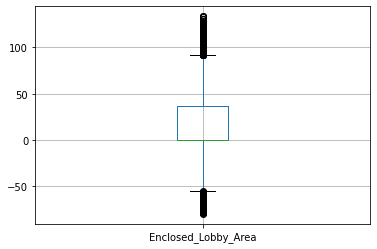

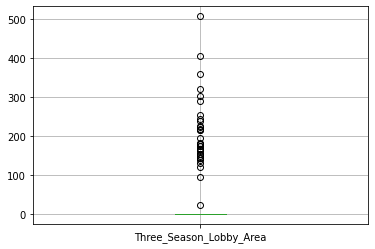

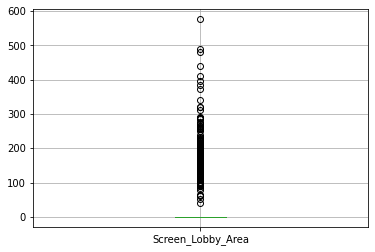

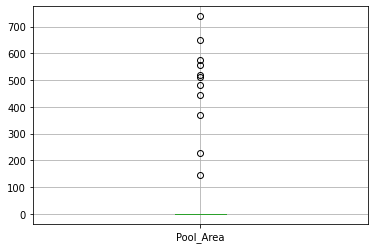

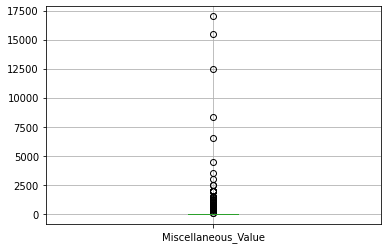

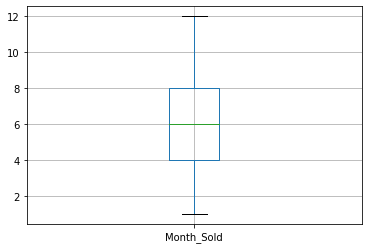

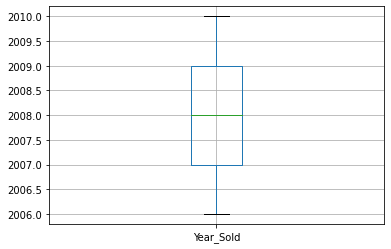

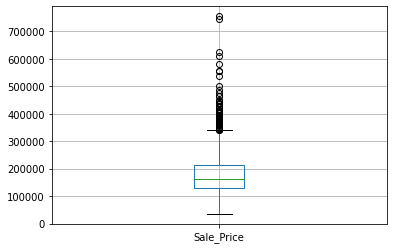

In [45]:
col=[]
for i in final_df1.columns:
    if final_df1[i].dtypes!=object:
        final_df1.boxplot(column=i)
        plt.show()

In [46]:
final_df1.drop(["BsmtFinSF2","LowQualFinSF","Three_Season_Lobby_Area","Screen_Lobby_Area","Pool_Area","Miscellaneous_Value",
                "Utility_Type","Roof_Quality","Basement_Condition","BsmtFinType2","Heating_Type","Electrical_System",
                "Functional_Rate","Garage_Quality","Garage_Condition","Sale_Type"],
              axis=1,inplace=True)

In [47]:
for i in final_df1.columns:
    if final_df1[i].dtypes==object:
        print(i,":")
        print(final_df1[i].value_counts())
        print()

Zoning_Class :
RLD       2004
RMD        400
FVR        129
RHD         24
Commer      18
Name: Zoning_Class, dtype: int64

Road_Type :
Paved     2564
Gravel      11
Name: Road_Type, dtype: int64

Property_Shape :
Reg    1644
IR1     848
IR2      68
IR3      15
Name: Property_Shape, dtype: int64

Land_Outline :
Lvl    2319
Bnk     107
HLS      98
Low      51
Name: Land_Outline, dtype: int64

Lot_Configuration :
I          1883
C           448
CulDSac     156
FR2P         78
FR3P         10
Name: Lot_Configuration, dtype: int64

Property_Slope :
GS    2450
MS     110
SS      15
Name: Property_Slope, dtype: int64

Neighborhood :
NAmes      388
CollgCr    239
OldTown    214
Somerst    169
Edwards    169
NridgHt    151
Gilbert    151
Sawyer     130
NWAmes     124
SawyerW    113
BrkSide    104
Crawfor     93
Mitchel     85
IDOTRR      74
NoRidge     63
Timber      58
StoneBr     42
SWISU       40
ClearCr     40
MeadowV     26
BrDale      25
Blmngtn     24
Veenker     23
NPkVill     20
Blues

In [48]:
final_df1.shape

(2575, 60)

In [49]:
final_df1=pd.get_dummies(final_df1)

In [50]:
final_df1.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Sale_Price,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Allo

In [51]:
final_df1.shape

(2575, 218)

In [52]:
final_df1=final_df1.iloc[:,~final_df1.columns.duplicated()]

In [53]:
final_df1.shape

(2575, 218)

In [54]:
col=[]
for i in final_df1.columns:
    col.append(i)

In [55]:
print(col)

['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Month_Sold', 'Year_Sold', 'Sale_Price', 'Zoning_Class_Commer', 'Zoning_Class_FVR', 'Zoning_Class_RHD', 'Zoning_Class_RLD', 'Zoning_Class_RMD', 'Road_Type_Gravel', 'Road_Type_Paved', 'Property_Shape_IR1', 'Property_Shape_IR2', 'Property_Shape_IR3', 'Property_Shape_Reg', 'Land_Outline_Bnk', 'Land_Outline_HLS', 'Land_Outline_Low', 'Land_Outline_Lvl', 'Lot_Configuration_C', 'Lot_Configuration_CulDSac', 'Lot_Configuration_FR2P', 'Lot_Configu

In [56]:
final_df1=final_df1[['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Month_Sold', 'Year_Sold', 'Zoning_Class_Commer', 'Zoning_Class_FVR', 'Zoning_Class_RHD', 'Zoning_Class_RLD', 'Zoning_Class_RMD', 'Road_Type_Gravel', 'Road_Type_Paved', 'Property_Shape_IR1', 'Property_Shape_IR2', 'Property_Shape_IR3', 'Property_Shape_Reg', 'Land_Outline_Bnk', 'Land_Outline_HLS', 'Land_Outline_Low', 'Land_Outline_Lvl', 'Lot_Configuration_C', 'Lot_Configuration_CulDSac', 'Lot_Configuration_FR2P', 'Lot_Configuration_FR3P', 'Lot_Configuration_I', 'Property_Slope_GS', 'Property_Slope_MS', 'Property_Slope_SS', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_NoRMD', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_NoRMD', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'House_Type_1Fam', 'House_Type_2fmCon', 'House_Type_Duplex', 'House_Type_Twnhs', 'House_Type_TwnhsE', 'House_Design_1.5Fin', 'House_Design_1.5Unf', 'House_Design_1Story', 'House_Design_2.5Fin', 'House_Design_2.5Unf', 'House_Design_2Story', 'House_Design_SFoyer', 'House_Design_SLvl', 'Roof_Design_Flat', 'Roof_Design_Gable', 'Roof_Design_Gambrel', 'Roof_Design_Hip', 'Roof_Design_Mansard', 'Roof_Design_Shed', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkComm', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_WdShing', 'Brick_Veneer_Type_BrkCmn', 'Brick_Veneer_Type_BrkFace', 'Brick_Veneer_Type_None', 'Brick_Veneer_Type_Stone', 'Exterior_Material_Ex', 'Exterior_Material_Fa', 'Exterior_Material_Gd', 'Exterior_Material_TA', 'Exterior_Condition_Ex', 'Exterior_Condition_Fa', 'Exterior_Condition_Gd', 'Exterior_Condition_Po', 'Exterior_Condition_TA', 'Foundation_Type_BT', 'Foundation_Type_CB', 'Foundation_Type_PC', 'Foundation_Type_S', 'Foundation_Type_SL', 'Foundation_Type_W', 'Basement_Height_Ex', 'Basement_Height_Fa', 'Basement_Height_Gd', 'Basement_Height_TA', 'Exposure_Level_Av', 'Exposure_Level_Gd', 'Exposure_Level_Mn', 'Exposure_Level_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'Heating_Quality_Ex', 'Heating_Quality_Fa', 'Heating_Quality_Gd', 'Heating_Quality_Po', 'Heating_Quality_TA', 'Air_Conditioning_N', 'Air_Conditioning_Y', 'Kitchen_Quality_Ex', 'Kitchen_Quality_Fa', 'Kitchen_Quality_Gd', 'Kitchen_Quality_TA', 'Fireplace_Quality_Ex', 'Fireplace_Quality_Fa', 'Fireplace_Quality_Gd', 'Fireplace_Quality_Po', 'Fireplace_Quality_TA', 'Garage_2TFes', 'Garage_2Types', 'Garage_Attchd', 'Garage_Basment', 'Garage_BuiltIn', 'Garage_CarPort', 'Garage_Detchd', 'Garage_Finish_Year_Fin', 'Garage_Finish_Year_RFn', 'Garage_Finish_Year_Unf', 'Pavedd_Drive_N', 'Pavedd_Drive_P', 'Pavedd_Drive_Y', 'Sale_Condition_AbnoRMDl', 'Sale_Condition_Abnorml', 'Sale_Condition_AdjLand', 'Sale_Condition_Alloca', 'Sale_Condition_Family', 'Sale_Condition_NoRMDal', 'Sale_Condition_Normal', 'Sale_Condition_Partial', 'Sale_Price']]

In [57]:
final_df1.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Con

In [58]:
final_df1.to_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Exported_data\concatedTrainTest.csv",
                index=True,header=True)